<a href="https://colab.research.google.com/github/sambhuyadav/Machine-Learning-Resources/blob/main/SST_2028_A_CLT_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Loading and Trimming Car_Prices_Poland Data

In [ ]:
#importing the Car_Prices_Poland dataset

!gdown 1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U

Car_Prices_Poland = pd.read_csv("Car_Prices_Poland_Kaggle.csv")

print(f"\n\nSuccess! Data loaded into dataframe Car_Prices_Poland:\n\n {Car_Prices_Poland.head()}")

print(f"\n\nShape of Car_Prices_Poland dataframe = {Car_Prices_Poland.shape}")

Downloading...
From: https://drive.google.com/uc?id=1TWXu3VB09tf9_kzdDORedjY1N0dMjp8U
To: /content/Car_Prices_Poland_Kaggle.csv
100% 9.89M/9.89M [00:00<00:00, 43.3MB/s]


Success! Data loaded into dataframe Car_Prices_Poland:

    Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  


Shape of Car_Prices_Poland dataframe 

In [ ]:
Car_Prices_Poland


,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [ ]:
Car_Prices_Poland['mark'].unique()

array(['opel', 'audi', 'bmw', 'volkswagen', 'ford', 'mercedes-benz',
       'renault', 'toyota', 'skoda', 'alfa-romeo', 'chevrolet', 'citroen',
       'fiat', 'honda', 'hyundai', 'kia', 'mazda', 'mini', 'mitsubishi',
       'nissan', 'peugeot', 'seat', 'volvo'], dtype=object)

In [ ]:
#Removing Outliers from mileage columns

q1 = np.percentile(Car_Prices_Poland['mileage'], 25)
q3 = np.percentile(Car_Prices_Poland['mileage'], 75)
iqr = q3-q1
left_limit_for_outliers = q1 - (1.5 * iqr)
right_limit_for_outliers = q3 + (1.5 * iqr)

print(f"Left and Right Limits for filtering 'mileage' outliers = [{left_limit_for_outliers : .1f},{right_limit_for_outliers : .1f}]")

Left and Right Limits for filtering 'mileage' outliers = [-137000.0, 407000.0]


In [ ]:
#Trimming the dataset by filtering OUT the rows with outlier mileages

Car_Prices_Trimmed = Car_Prices_Poland[(Car_Prices_Poland['mileage'] > left_limit_for_outliers) & (Car_Prices_Poland['mileage'] < right_limit_for_outliers)]

print(f"Shape of trimmed dataset Car_Prices_Trimmed = {Car_Prices_Trimmed.shape}")

print(f"\nFirst five rows of the Car_Prices_Trimmed dataset: \n\n{Car_Prices_Trimmed.head()}")

Shape of trimmed dataset Car_Prices_Trimmed = (117462, 11)

First five rows of the Car_Prices_Trimmed dataset: 

   Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  


#Population data: Distribution of mileages

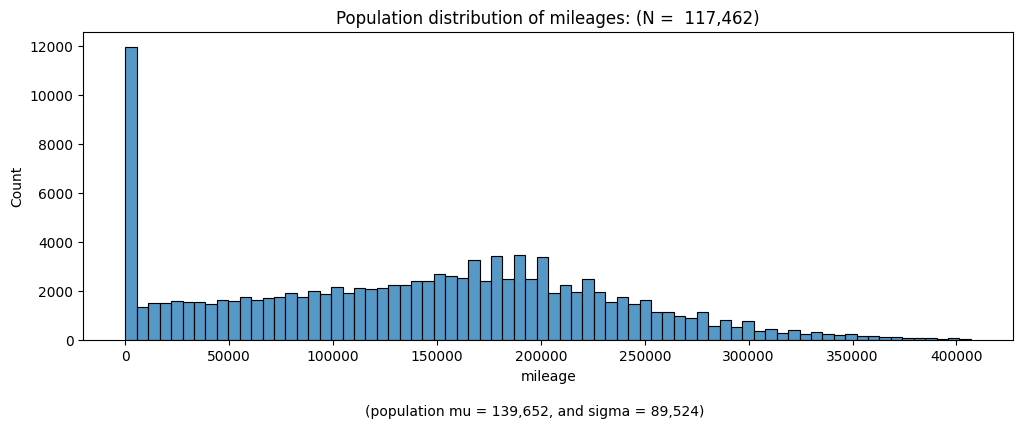

In [ ]:
#Plot the population distribution of mileages

plt.figure(figsize=(12,4))
plt.title(f"Population distribution of mileages: (N = {Car_Prices_Trimmed.shape[0] : ,})")
plt.figtext(0.36, -0.08, f"(population mu = {int(Car_Prices_Trimmed['mileage'].mean()):,}, and sigma = {int(Car_Prices_Trimmed['mileage'].std()):,})")
sns.histplot(Car_Prices_Trimmed['mileage'])
plt.show()

#Sampling cars to predict mileage of the population

Sample statistics from each of the 8 samples of sample size = 10:


    Sample_index     |     Sample_Mean      |                           First 10 mileages in sample                           
------------------------------------------------------------------------------------------------------------------------
         0           |       106,320        | [109000  64600 207000  19000      5   2600 214000 240000 191000  16000]
------------------------------------------------------------------------------------------------------------------------
         1           |       109,209        | [219000 118000 198000  33300  95040  76900      1 166848      1 185000]
------------------------------------------------------------------------------------------------------------------------
         2           |       119,641        | [170000 287000  75241 166465 190000  13794  90000  12917  48000 143000]
----------------------------------------------------------------------------------------

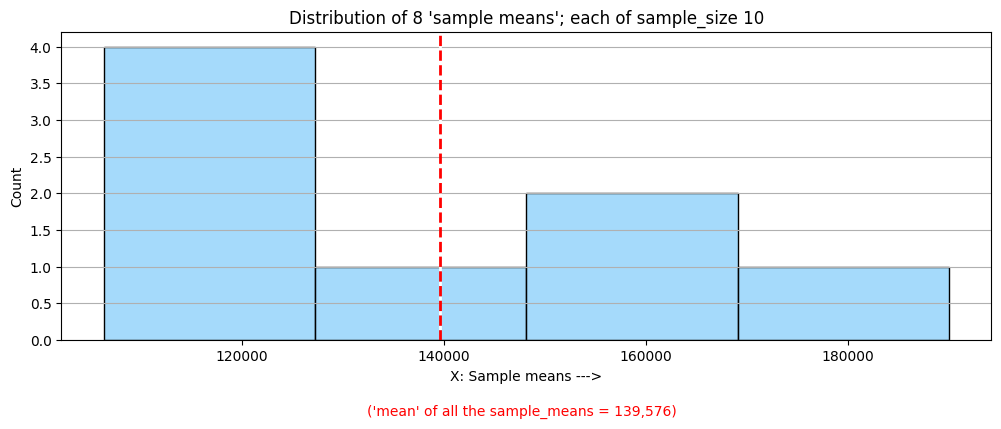

In [ ]:
#Sample size (n)
n = 10

#Number of random samples to be picked (each of size 'n')
num_of_samples = 8

samples = np.random.choice(Car_Prices_Trimmed['mileage'], size=(num_of_samples, n))
sample_means = samples.mean(axis=1)


print(f"Sample statistics from each of the {num_of_samples} samples of sample size = {n}:\n\n")

print(f"{'Sample_index' : ^20} | {'Sample_Mean' : ^20} | {f'First {min(10,n)} mileages in sample' : ^80}")
print("-"*120)

for i, sample_i in enumerate(samples):
  print(f"{i : ^20d} | {int(sample_i.mean()): ^20,d} | {np.array(sample_i)[:10]}")
  print("-"*120)



#Plot the above sample means
print("\n\n Plot of the above sample means: \n\n")

plt.figure(figsize=(12,4))
plt.title(f"Distribution of {num_of_samples} 'sample means'; each of sample_size {n}")
sns.histplot(x=sample_means, stat='count', color="lightskyblue")
plt.grid(axis='y')
plt.axvline(sample_means.mean(), color="red", linewidth=2, linestyle='dashed', gapcolor="white")
plt.xlabel("X: Sample means --->")
plt.figtext(0.38, -0.08, f"('mean' of all the sample_means = {int(sample_means.mean()):,})", color="red")
plt.show()


Let's increase the number of samples to a very large number

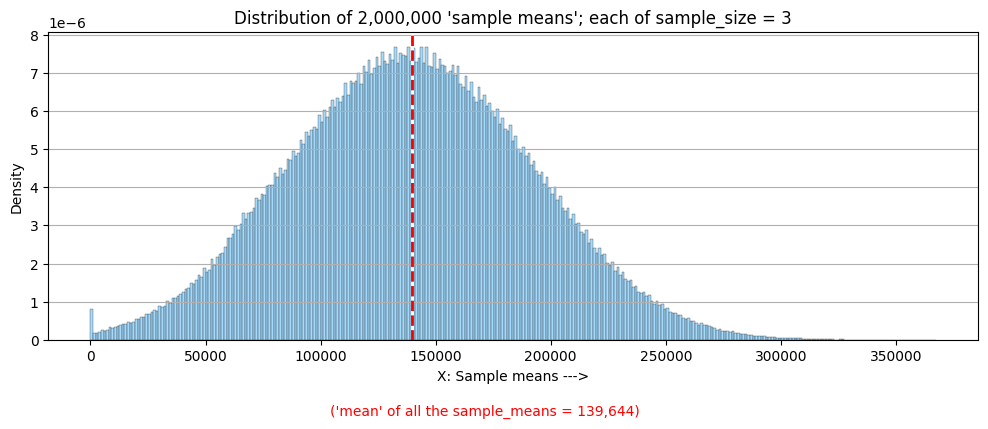

In [ ]:
#Sample size (n)
n = 3

#Number of random samples to be picked (each of size 'n')
num_of_samples = 2000000

samples = np.random.choice(Car_Prices_Trimmed['mileage'], size=(num_of_samples, n))
sample_means = samples.mean(axis=1)



plt.figure(figsize=(12,4))
plt.title(f"Distribution of {num_of_samples:,} 'sample means'; each of sample_size = {n}")
sns.histplot(x=sample_means, stat='density', color="lightskyblue") #stat= 'count' / 'density' / 'kde'
plt.grid(axis='y')
plt.axvline(sample_means.mean(), color="red", linewidth=2, linestyle='dashed', gapcolor="white")
plt.xlabel("X: Sample means --->")
plt.figtext(0.36, -0.08,f"('mean' of all the sample_means = {int(sample_means.mean()):,})", color='red')
plt.show()


#CLT curves for different sample sizes (n)

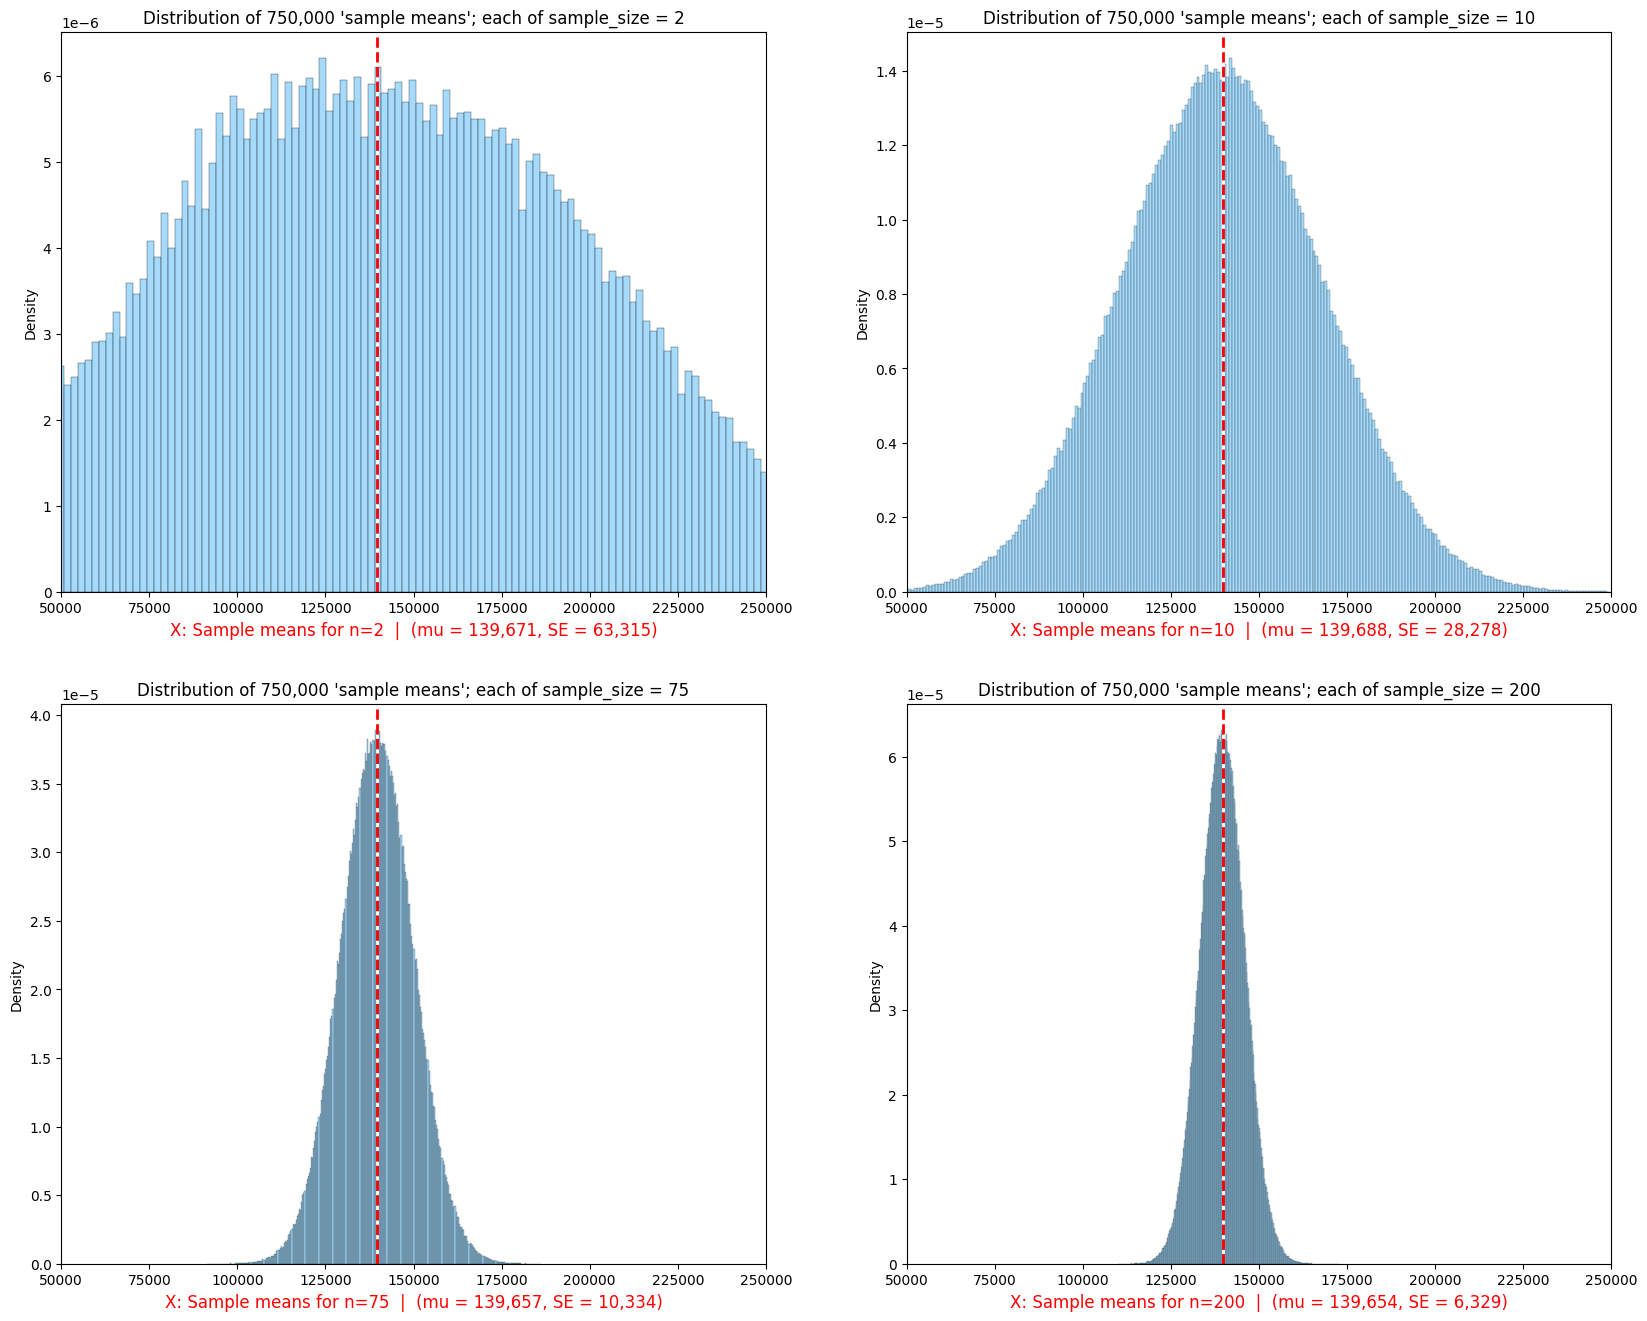

In [ ]:
"""NOTE: the below code may take 10 to 20 seconds to execute"""


plt.figure(figsize=(20,16))

#Number of random samples to be picked (each of size 'n')
num_of_samples = 750_000

#Varying sample sizes
n = 10

for i,n in enumerate([2, 10, 75, 200]):

  samples = np.random.choice(Car_Prices_Trimmed['mileage'], size=(num_of_samples, n))
  sample_means = samples.mean(axis=1)

  #Subplot (2,2,i)
  plt.subplot(2,2,i+1)
  plt.title(f"Distribution of {num_of_samples:,} 'sample means'; each of sample_size = {n}")
  sns.histplot(x=sample_means, stat='density', color="lightskyblue")
  plt.axvline(sample_means.mean(), color="red", linewidth=2, linestyle='dashed', gapcolor="white")
  plt.xlabel(f"X: Sample means for n={n}  |  (mu = {int(sample_means.mean()):,}, SE = {int(sample_means.std()):,})", color="red", fontsize=12)
  plt.xlim(50000,250000)


plt.show()


In [ ]:
pop_sigma = 89524

n = 200

pop_sigma / np.sqrt(n)

6330.302747894448

#Quizzes

In [ ]:
from scipy import stats

#stats.norm.cdf()

#stats.norm.ppf()

In [ ]:
"""
In an e-commerce website, the average purchase amount per customer is 80
and standard deviation of 15.
If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount
in the sample will be less than $75?
"""

#population
mu = 80
sigma = 15


#for my CLT curve
n = 50
mu_CLT = 80
SE_CLT = sigma / np.sqrt(n)
x = 75

z = (x - mu_CLT) / SE_CLT

stats.norm.cdf(z)

0.009211062727049501

In [ ]:
"""
The life of LED light bulbs manufactured in a factory has
a mean equal to 900 hours and a standard deviation of 50 hours.
Find the probability that a random sample of 20 bulbs
will have an average life of less than 850 hours.
"""

#Pop
mu = 900
sigma = 50

#CLT curve
n = 20
mu = 900
SE = sigma / np.sqrt(n)
x = 850

z = (x-mu)/SE

stats.norm.cdf(z)

3.872108215522035e-06